<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/DeepCV/0212_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mkdir -p aiffel/cifar_10_small

ln -s ~/data/cifar_10_small/train/ aiffel/cifar_10_small/train
ln -s ~/data/cifar_10_small/test/ aiffel/cifar_10_small/test

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_dir='aiffel/cifar_10_small/train'
test_dir='aiffel/cifar_10_small/test'

train_aeroplane_dir= os.path.join(train_dir,'aeroplane')
train_bird_dir=os.path.join(train_dir,'bird')
train_car_dir= os.path.join(train_dir,'car')
train_cat_dir=os.path.join(train_dir,'cat')

test_aeroplane_dir= os.path.join(test_dir,'aeroplane')
test_bird_dir=os.path.join(test_dir,'bird')
test_car_dir= os.path.join(test_dir,'car')
test_cat_dir=os.path.join(test_dir,'cat')

In [ ]:
# 훈련용 데이터셋의 이미지 개수 출력
print('훈련용 aeroplane 이미지 전체 개수:', len(os.listdir(train_aeroplane_dir)))
print('훈련용 bird 이미지 전체 개수:', len(os.listdir(train_bird_dir)))
print('훈련용 car 이미지 전체 개수:', len(os.listdir(train_car_dir)))
print('훈련용 cat 이미지 전체 개수:', len(os.listdir(train_cat_dir)))

훈련용 aeroplane 이미지 전체 개수: 5000

훈련용 bird 이미지 전체 개수: 5000

훈련용 car 이미지 전체 개수: 5000

훈련용 cat 이미지 전체 개수: 5000

In [ ]:
# Q. 테스트용 데이터셋의 이미지 개수를 각 디렉토리별로 출력해 보세요.
# [[YOUR CODE]]
print('테스트용 aeroplane 이미지 전체 개수:', len(os.listdir(test_aeroplane_dir)))
print('테스트용 bird 이미지 전체 개수:', len(os.listdir(test_bird_dir)))
print('테스트용 car 이미지 전체 개수:', len(os.listdir(test_car_dir)))
print('테스트용 cat 이미지 전체 개수:', len(os.listdir(test_cat_dir)))

테스트용 aeroplane 이미지 전체 개수: 1000

테스트용 bird 이미지 전체 개수: 1000

테스트용 car 이미지 전체 개수: 1000

테스트용 cat 이미지 전체 개수: 1000

In [ ]:
### data 파이프 라인 생성

# 데이터를 디렉토리로부터 불러올 때, 한번에 가져올 데이터의 수
batch_size=20

# Training 데이터의 augmentation 파이프 라인 만들기
augmentation_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale=1./255,  # 모든 데이터의 값을 1/255로 스케일 조정
                                    rotation_range=40,  # 0~40도 사이로 이미지 회전
                                    width_shift_range=0.2,  # 전체 가로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    height_shift_range=0.2,   # 전체 세로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    shear_range=0.2,  # 0.2 라디안 정도까지 이미지를 기울이기
                                    zoom_range=0.2, # 확대와 축소의 범위 [1-0.2 ~ 1+0.2 ]
                                    horizontal_flip=True,)  # 수평 기준 플립을 할 지, 하지 않을 지를 결정

# Test 데이터의 augmentation 파이프 라인 만들기
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Augmentation 파이프라인을 기준으로 디렉토리로부터 데이터를 불러 오는 모듈 만들기
train_generator = augmentation_train_datagen.flow_from_directory(
        directory=train_dir, #  어느 디렉터리에서 이미지 데이터를 가져올 것인가?
        target_size=(150, 150), # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=batch_size, # 디렉토리에서 batch size만큼의 이미지를 가져옵니다.
        interpolation='bilinear',  # resize를 할 때, interpolatrion 기법을 결정합니다.
        color_mode ='rgb',
        shuffle='True', # 이미지를 셔플링할 지 하지 않을 지를 결정.
        class_mode='categorical') # multiclass의 경우이므로 class mode는 categorical

print(train_generator.class_indices)

Found 20000 images belonging to 4 classes.

{'aeroplane': 0, 'bird': 1, 'car': 2, 'cat': 3}

In [ ]:
# Q. Test 데이터 디렉토리로부터 이미지를 불러오는 파이프라인을 완성해 보세요.
# (위의 train_generator와 조건은 동일)
test_generator = test_datagen.flow_from_directory(

    # [[YOUR CODE]]
    directory=test_dir, # 테스트 데이터가 있는 디렉토리 경로
    target_size=(150, 150), # 이미지 크기 150x150으로 설정
    batch_size=batch_size, # 배치 크기 설정
    interpolation='bilinear', # 이미지 크기 조정 방법 설정
    color_mode='rgb', # 컬러 모드 설정
    shuffle=False, # 테스트 데이터는 셔플링하지 않음
    class_mode='categorical' # 클래스 모드 설정

    )

Found 4000 images belonging to 4 classes.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)

배치 레이블 크기: (20, 4)

In [ ]:
## back bone
conv_base=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)
conv_base.summary()

Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
94773248/94765736 [==============================] - 0s 0us/step
94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6 0           conv1_bn[0][0]                   
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_relu[0][0]                 
__________________________________________________________________________________________________
pool1_pool (MaxPooling2D)       (None, None, None, 6 0           pool1_pad[0][0]                  
__________________________________________________________________________________________________
conv2_block1_1_conv (Conv2D)    (None, None, None, 6 4160        pool1_pool[0][0]                 
__________________________________________________________________________________________________
conv2_block1_1_bn (BatchNormali (None, None, None, 6 256         conv2_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv2_block1_1_relu (Activation (None, None, None, 6 0           conv2_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv2_block1_2_conv (Conv2D)    (None, None, None, 6 36928       conv2_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv2_block1_2_bn (BatchNormali (None, None, None, 6 256         conv2_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv2_block1_2_relu (Activation (None, None, None, 6 0           conv2_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv2_block1_0_conv (Conv2D)    (None, None, None, 2 16640       pool1_pool[0][0]                 
__________________________________________________________________________________________________
conv2_block1_3_conv (Conv2D)    (None, None, None, 2 16640       conv2_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv2_block1_0_bn (BatchNormali (None, None, None, 2 1024        conv2_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv2_block1_3_bn (BatchNormali (None, None, None, 2 1024        conv2_block1_3_conv[0][0]        
__________________________________________________________________________________________________
conv2_block1_add (Add)          (None, None, None, 2 0           conv2_block1_0_bn[0][0]          
                                                                 conv2_block1_3_bn[0][0]          
__________________________________________________________________________________________________
conv2_block1_out (Activation)   (None, None, None, 2 0           conv2_block1_add[0][0]           
__________________________________________________________________________________________________
conv2_block2_1_conv (Conv2D)    (None, None, None, 6 16448       conv2_block1_out[0][0]           
__________________________________________________________________________________________________
conv2_block2_1_bn (BatchNormali (None, None, None, 6 256         conv2_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv2_block2_1_relu (Activation (None, None, None, 6 0           conv2_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv2_block2_2_conv (Conv2D)    (None, None, None, 6 36928       conv2_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv2_block2_2_bn (BatchNormali (None, None, None, 6 256         conv2_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv2_block2_2_relu (Activation (None, None, None, 6 0           conv2_block2_2_bn[0][0]          
__________________________________________________________________________________________________
conv2_block2_3_conv (Conv2D)    (None, None, None, 2 16640       conv2_block2_2_relu[0][0]        
__________________________________________________________________________________________________
conv2_block2_3_bn (BatchNormali (None, None, None, 2 1024        conv2_block2_3_conv[0][0]        
__________________________________________________________________________________________________
conv2_block2_add (Add)          (None, None, None, 2 0           conv2_block1_out[0][0]           
                                                                 conv2_block2_3_bn[0][0]          
__________________________________________________________________________________________________
conv2_block2_out (Activation)   (None, None, None, 2 0           conv2_block2_add[0][0]           
__________________________________________________________________________________________________
conv2_block3_1_conv (Conv2D)    (None, None, None, 6 16448       conv2_block2_out[0][0]           
__________________________________________________________________________________________________
conv2_block3_1_bn (BatchNormali (None, None, None, 6 256         conv2_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv2_block3_1_relu (Activation (None, None, None, 6 0           conv2_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv2_block3_2_conv (Conv2D)    (None, None, None, 6 36928       conv2_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv2_block3_2_bn (BatchNormali (None, None, None, 6 256         conv2_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv2_block3_2_relu (Activation (None, None, None, 6 0           conv2_block3_2_bn[0][0]          
__________________________________________________________________________________________________
conv2_block3_3_conv (Conv2D)    (None, None, None, 2 16640       conv2_block3_2_relu[0][0]        
__________________________________________________________________________________________________
conv2_block3_3_bn (BatchNormali (None, None, None, 2 1024        conv2_block3_3_conv[0][0]        
__________________________________________________________________________________________________
conv2_block3_add (Add)          (None, None, None, 2 0           conv2_block2_out[0][0]           
                                                                 conv2_block3_3_bn[0][0]          
__________________________________________________________________________________________________
conv2_block3_out (Activation)   (None, None, None, 2 0           conv2_block3_add[0][0]           
__________________________________________________________________________________________________
conv3_block1_1_conv (Conv2D)    (None, None, None, 1 32896       conv2_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block1_1_bn (BatchNormali (None, None, None, 1 512         conv3_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_1_relu (Activation (None, None, None, 1 0           conv3_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_2_conv (Conv2D)    (None, None, None, 1 147584      conv3_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block1_2_bn (BatchNormali (None, None, None, 1 512         conv3_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_2_relu (Activation (None, None, None, 1 0           conv3_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_0_conv (Conv2D)    (None, None, None, 5 131584      conv2_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block1_3_conv (Conv2D)    (None, None, None, 5 66048       conv3_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block1_0_bn (BatchNormali (None, None, None, 5 2048        conv3_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_3_bn (BatchNormali (None, None, None, 5 2048        conv3_block1_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block1_add (Add)          (None, None, None, 5 0           conv3_block1_0_bn[0][0]          
                                                                 conv3_block1_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block1_out (Activation)   (None, None, None, 5 0           conv3_block1_add[0][0]           
__________________________________________________________________________________________________
conv3_block2_1_conv (Conv2D)    (None, None, None, 1 65664       conv3_block1_out[0][0]           
__________________________________________________________________________________________________
conv3_block2_1_bn (BatchNormali (None, None, None, 1 512         conv3_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block2_1_relu (Activation (None, None, None, 1 0           conv3_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block2_2_conv (Conv2D)    (None, None, None, 1 147584      conv3_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block2_2_bn (BatchNormali (None, None, None, 1 512         conv3_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block2_2_relu (Activation (None, None, None, 1 0           conv3_block2_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block2_3_conv (Conv2D)    (None, None, None, 5 66048       conv3_block2_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block2_3_bn (BatchNormali (None, None, None, 5 2048        conv3_block2_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block2_add (Add)          (None, None, None, 5 0           conv3_block1_out[0][0]           
                                                                 conv3_block2_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block2_out (Activation)   (None, None, None, 5 0           conv3_block2_add[0][0]           
__________________________________________________________________________________________________
conv3_block3_1_conv (Conv2D)    (None, None, None, 1 65664       conv3_block2_out[0][0]           
__________________________________________________________________________________________________
conv3_block3_1_bn (BatchNormali (None, None, None, 1 512         conv3_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block3_1_relu (Activation (None, None, None, 1 0           conv3_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block3_2_conv (Conv2D)    (None, None, None, 1 147584      conv3_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block3_2_bn (BatchNormali (None, None, None, 1 512         conv3_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block3_2_relu (Activation (None, None, None, 1 0           conv3_block3_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block3_3_conv (Conv2D)    (None, None, None, 5 66048       conv3_block3_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block3_3_bn (BatchNormali (None, None, None, 5 2048        conv3_block3_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block3_add (Add)          (None, None, None, 5 0           conv3_block2_out[0][0]           
                                                                 conv3_block3_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block3_out (Activation)   (None, None, None, 5 0           conv3_block3_add[0][0]           
__________________________________________________________________________________________________
conv3_block4_1_conv (Conv2D)    (None, None, None, 1 65664       conv3_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, None, None, 1 512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, None, None, 1 0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, None, None, 1 147584      conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_2_bn (BatchNormali (None, None, None, 1 512         conv3_block4_2_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_2_relu (Activation (None, None, None, 1 0           conv3_block4_2_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_3_conv (Conv2D)    (None, None, None, 5 66048       conv3_block4_2_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_3_bn (BatchNormali (None, None, None, 5 2048        conv3_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_add (Add)          (None, None, None, 5 0           conv3_block3_out[0][0]           
                                                                 conv3_block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, None, None, 5 0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, None, None, 2 131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, None, None, 2 0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, None, None, 2 0           conv4_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_0_conv (Conv2D)    (None, None, None, 1 525312      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_3_conv (Conv2D)    (None, None, None, 1 263168      conv4_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_0_bn (BatchNormali (None, None, None, 1 4096        conv4_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_3_bn (BatchNormali (None, None, None, 1 4096        conv4_block1_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_add (Add)          (None, None, None, 1 0           conv4_block1_0_bn[0][0]          
                                                                 conv4_block1_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_out (Activation)   (None, None, None, 1 0           conv4_block1_add[0][0]           
__________________________________________________________________________________________________
conv4_block2_1_conv (Conv2D)    (None, None, None, 2 262400      conv4_block1_out[0][0]           
__________________________________________________________________________________________________
conv4_block2_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block2_1_relu (Activation (None, None, None, 2 0           conv4_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block2_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block2_2_relu (Activation (None, None, None, 2 0           conv4_block2_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block2_3_conv (Conv2D)    (None, None, None, 1 263168      conv4_block2_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_3_bn (BatchNormali (None, None, None, 1 4096        conv4_block2_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block2_add (Add)          (None, None, None, 1 0           conv4_block1_out[0][0]           
                                                                 conv4_block2_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block2_out (Activation)   (None, None, None, 1 0           conv4_block2_add[0][0]           
__________________________________________________________________________________________________
conv4_block3_1_conv (Conv2D)    (None, None, None, 2 262400      conv4_block2_out[0][0]           
__________________________________________________________________________________________________
conv4_block3_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_1_relu (Activation (None, None, None, 2 0           conv4_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block3_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_2_relu (Activation (None, None, None, 2 0           conv4_block3_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_3_conv (Conv2D)    (None, None, None, 1 263168      conv4_block3_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block3_3_bn (BatchNormali (None, None, None, 1 4096        conv4_block3_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_add (Add)          (None, None, None, 1 0           conv4_block2_out[0][0]           
                                                                 conv4_block3_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_out (Activation)   (None, None, None, 1 0           conv4_block3_add[0][0]           
__________________________________________________________________________________________________
conv4_block4_1_conv (Conv2D)    (None, None, None, 2 262400      conv4_block3_out[0][0]           
__________________________________________________________________________________________________
conv4_block4_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_1_relu (Activation (None, None, None, 2 0           conv4_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block4_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block4_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_2_relu (Activation (None, None, None, 2 0           conv4_block4_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_3_conv (Conv2D)    (None, None, None, 1 263168      conv4_block4_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block4_3_bn (BatchNormali (None, None, None, 1 4096        conv4_block4_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_add (Add)          (None, None, None, 1 0           conv4_block3_out[0][0]           
                                                                 conv4_block4_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_out (Activation)   (None, None, None, 1 0           conv4_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block5_1_conv (Conv2D)    (None, None, None, 2 262400      conv4_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block5_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block5_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block5_1_relu (Activation (None, None, None, 2 0           conv4_block5_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block5_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block5_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block5_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block5_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block5_2_relu (Activation (None, None, None, 2 0           conv4_block5_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block5_3_conv (Conv2D)    (None, None, None, 1 263168      conv4_block5_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block5_3_bn (BatchNormali (None, None, None, 1 4096        conv4_block5_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block5_add (Add)          (None, None, None, 1 0           conv4_block4_out[0][0]           
                                                                 conv4_block5_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block5_out (Activation)   (None, None, None, 1 0           conv4_block5_add[0][0]           
__________________________________________________________________________________________________
conv4_block6_1_conv (Conv2D)    (None, None, None, 2 262400      conv4_block5_out[0][0]           
__________________________________________________________________________________________________
conv4_block6_1_bn (BatchNormali (None, None, None, 2 1024        conv4_block6_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_1_relu (Activation (None, None, None, 2 0           conv4_block6_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_2_conv (Conv2D)    (None, None, None, 2 590080      conv4_block6_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block6_2_bn (BatchNormali (None, None, None, 2 1024        conv4_block6_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_2_relu (Activation (None, None, None, 2 0           conv4_block6_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_3_conv (Conv2D)    (None, None, None, 1 263168      conv4_block6_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block6_3_bn (BatchNormali (None, None, None, 1 4096        conv4_block6_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_add (Add)          (None, None, None, 1 0           conv4_block5_out[0][0]           
                                                                 conv4_block6_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_out (Activation)   (None, None, None, 1 0           conv4_block6_add[0][0]           
__________________________________________________________________________________________________
conv5_block1_1_conv (Conv2D)    (None, None, None, 5 524800      conv4_block6_out[0][0]           
__________________________________________________________________________________________________
conv5_block1_1_bn (BatchNormali (None, None, None, 5 2048        conv5_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_1_relu (Activation (None, None, None, 5 0           conv5_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block1_2_conv (Conv2D)    (None, None, None, 5 2359808     conv5_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block1_2_bn (BatchNormali (None, None, None, 5 2048        conv5_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_2_relu (Activation (None, None, None, 5 0           conv5_block1_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_block1_0_conv (Conv2D)    (None, None, None, 2 2099200     conv4_block6_out[0][0]           
__________________________________________________________________________________________________
conv5_block1_3_conv (Conv2D)    (None, None, None, 2 1050624     conv5_block1_2_relu[0][0]        
__________________________________________________________________________________________________
conv5_block1_0_bn (BatchNormali (None, None, None, 2 8192        conv5_block1_0_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_3_bn (BatchNormali (None, None, None, 2 8192        conv5_block1_3_conv[0][0]        
__________________________________________________________________________________________________
conv5_block1_add (Add)          (None, None, None, 2 0           conv5_block1_0_bn[0][0]          
                                                                 conv5_block1_3_bn[0][0]          
__________________________________________________________________________________________________
conv5_block1_out (Activation)   (None, None, None, 2 0           conv5_block1_add[0][0]           
__________________________________________________________________________________________________
conv5_block2_1_conv (Conv2D)    (None, None, None, 5 1049088     conv5_block1_out[0][0]           
__________________________________________________________________________________________________
conv5_block2_1_bn (BatchNormali (None, None, None, 5 2048        conv5_block2_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_1_relu (Activation (None, None, None, 5 0           conv5_block2_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_2_conv (Conv2D)    (None, None, None, 5 2359808     conv5_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_bn (BatchNormali (None, None, None, 5 2048        conv5_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_2_relu (Activation (None, None, None, 5 0           conv5_block2_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_3_conv (Conv2D)    (None, None, None, 2 1050624     conv5_block2_2_relu[0][0]        
__________________________________________________________________________________________________
conv5_block2_3_bn (BatchNormali (None, None, None, 2 8192        conv5_block2_3_conv[0][0]        
__________________________________________________________________________________________________
conv5_block2_add (Add)          (None, None, None, 2 0           conv5_block1_out[0][0]           
                                                                 conv5_block2_3_bn[0][0]          
__________________________________________________________________________________________________
conv5_block2_out (Activation)   (None, None, None, 2 0           conv5_block2_add[0][0]           
__________________________________________________________________________________________________
conv5_block3_1_conv (Conv2D)    (None, None, None, 5 1049088     conv5_block2_out[0][0]           
__________________________________________________________________________________________________
conv5_block3_1_bn (BatchNormali (None, None, None, 5 2048        conv5_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_1_relu (Activation (None, None, None, 5 0           conv5_block3_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_2_conv (Conv2D)    (None, None, None, 5 2359808     conv5_block3_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_bn (BatchNormali (None, None, None, 5 2048        conv5_block3_2_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_2_relu (Activation (None, None, None, 5 0           conv5_block3_2_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_3_conv (Conv2D)    (None, None, None, 2 1050624     conv5_block3_2_relu[0][0]        
__________________________________________________________________________________________________
conv5_block3_3_bn (BatchNormali (None, None, None, 2 8192        conv5_block3_3_conv[0][0]        
__________________________________________________________________________________________________
conv5_block3_add (Add)          (None, None, None, 2 0           conv5_block2_out[0][0]           
                                                                 conv5_block3_3_bn[0][0]          
__________________________________________________________________________________________________
conv5_block3_out (Activation)   (None, None, None, 2 0           conv5_block3_add[0][0]           
==================================================================================================
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________

In [ ]:
# 최종 모델 구성하기
input_layer = tf.keras.layers.Input(shape=(150,150,3))
x = conv_base(input_layer) # 위에서 불러온 pretrained model을 활용하기
# 불러온 conv_base 모델의 최종 결과물은 Conv2D 연산의 feature map과 동일
# 따라서 최종적인 Multiclass classfication을 하기 위해서는 Flatten을 해야 한다.
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer = tf.keras.layers.Dense(4, activation='softmax')(x)

In [ ]:
conv_base.trainable = False

In [ ]:
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
=================================================================
Total params: 49,804,676
Trainable params: 26,216,964
Non-trainable params: 23,587,712
_________________________________________________________________

In [ ]:
# [Playground] conv_base.trainable의 값을 True와 False로 바꿔가면서
# Trainable params의 값이 어떻게 바뀌나 확인하고 분석해 보세요.

# [[YOUR CODE]]
conv_base.trainable = True
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
=================================================================
Total params: 49,804,676
Trainable params: 49,751,556
Non-trainable params: 53,120
_________________________________________________________________

#**conv_base.trainable = False일 때는**
conv_base의 파라미터가 학습되지 않으므로,

그 값은 Non-trainable params에 포함됩니다.

#**conv_base.trainable = True로 설정하면**
conv_base의 파라미터들이 학습 가능해지기 때문에 Non-trainable params는 줄어듭니다.

**여전히 남아있는 Non-trainable params:**

이는 conv_base 외의 다른 층들(예: Dense, BatchNormalization에서의 고정된 값들)에서 여전히 학습되지 않는 파라미터들이 존재하기 때문

In [ ]:
loss_function=tf.keras.losses.categorical_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [ ]:
history = model.fit(
      train_generator,
     steps_per_epoch=(len(os.listdir(train_aeroplane_dir)) + len(os.listdir(train_bird_dir)) + len(
       os.listdir(train_car_dir)) + len(os.listdir(train_cat_dir))) // batch_size,
      epochs=20,
      validation_data=test_generator,
      validation_freq=1)

Epoch 1/20
1000/1000 [==============================] - 208s 150ms/step - loss: 0.4093 - categorical_accuracy: 0.8636 - val_loss: 0.2098 - val_categorical_accuracy: 0.9277
Epoch 2/20
1000/1000 [==============================] - 145s 145ms/step - loss: 0.2321 - categorical_accuracy: 0.9182 - val_loss: 0.1620 - val_categorical_accuracy: 0.9498
Epoch 3/20
1000/1000 [==============================] - 145s 145ms/step - loss: 0.2107 - categorical_accuracy: 0.9276 - val_loss: 0.1365 - val_categorical_accuracy: 0.9505
Epoch 4/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1726 - categorical_accuracy: 0.9384 - val_loss: 0.2083 - val_categorical_accuracy: 0.9312
Epoch 5/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1789 - categorical_accuracy: 0.9390 - val_loss: 0.1392 - val_categorical_accuracy: 0.9525
Epoch 6/20
1000/1000 [==============================] - 145s 145ms/step - loss: 0.1569 - categorical_accuracy: 0.9451 - val_loss: 0.1476 - val_categorical_accuracy: 0.9510
Epoch 7/20
1000/1000 [==============================] - 145s 144ms/step - loss: 0.1860 - categorical_accuracy: 0.9412 - val_loss: 0.1393 - val_categorical_accuracy: 0.9515
Epoch 8/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1555 - categorical_accuracy: 0.9441 - val_loss: 0.1204 - val_categorical_accuracy: 0.9597
Epoch 9/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1349 - categorical_accuracy: 0.9520 - val_loss: 0.1262 - val_categorical_accuracy: 0.9592
Epoch 10/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1376 - categorical_accuracy: 0.9521 - val_loss: 0.1454 - val_categorical_accuracy: 0.9510
Epoch 11/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1471 - categorical_accuracy: 0.9510 - val_loss: 0.1176 - val_categorical_accuracy: 0.9603
Epoch 12/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1379 - categorical_accuracy: 0.9535 - val_loss: 0.1647 - val_categorical_accuracy: 0.9500
Epoch 13/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1435 - categorical_accuracy: 0.9513 - val_loss: 0.1223 - val_categorical_accuracy: 0.9550
Epoch 14/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1599 - categorical_accuracy: 0.9482 - val_loss: 0.1430 - val_categorical_accuracy: 0.9582
Epoch 15/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1385 - categorical_accuracy: 0.9548 - val_loss: 0.3970 - val_categorical_accuracy: 0.9457
Epoch 16/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1254 - categorical_accuracy: 0.9577 - val_loss: 0.1287 - val_categorical_accuracy: 0.9615
Epoch 17/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1349 - categorical_accuracy: 0.9556 - val_loss: 0.1656 - val_categorical_accuracy: 0.9485
Epoch 18/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1146 - categorical_accuracy: 0.9615 - val_loss: 0.3153 - val_categorical_accuracy: 0.8988
Epoch 19/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1506 - categorical_accuracy: 0.9546 - val_loss: 0.1031 - val_categorical_accuracy: 0.9700
Epoch 20/20
1000/1000 [==============================] - 144s 144ms/step - loss: 0.1435 - categorical_accuracy: 0.9545 - val_loss: 0.1275 - val_categorical_accuracy: 0.9572

In [ ]:
model.save('/aiffel/aiffel/cifar_10_small/multi_classification_augumentation_model.hdf5')

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '

In [ ]:
# # 학습한 결과 시각화
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

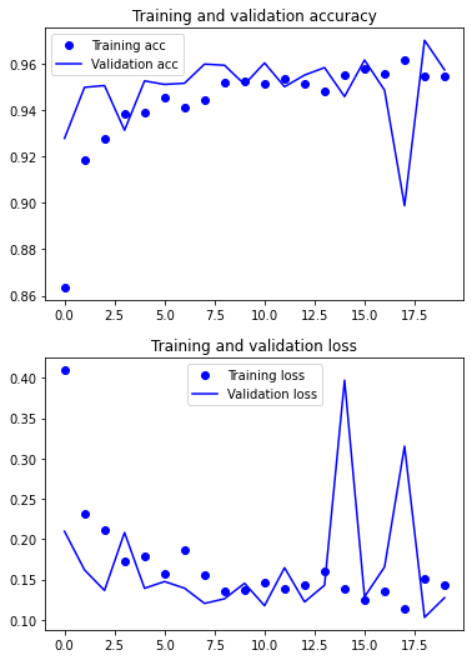